In [1]:
import pandas as pd

# Load the datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

# Merge orders with order items
merged_df = pd.merge(order_items, orders, on='order_id')

# Calculate the delivery time (in days) for each item
merged_df['delivery_time_days'] = (pd.to_datetime(merged_df['order_delivered_customer_date']) - 
                                   pd.to_datetime(merged_df['order_purchase_timestamp'])).dt.days

# Calculate the total delivery time for each order
merged_df['total_delivery_time'] = merged_df.groupby('order_id')['delivery_time_days'].transform('sum')

# Estimating labor cost (for simplicity, assume a fixed rate per day)
labor_cost_per_day = 20  # Example rate in dollars
merged_df['estimated_labor_cost'] = merged_df['delivery_time_days'] * labor_cost_per_day

# Calculate total labor cost per order
merged_df['total_labor_cost'] = merged_df.groupby('order_id')['estimated_labor_cost'].transform('sum')

# Aggregated results
result = merged_df.groupby('order_id').agg({
    'order_item_id': 'nunique',
    'total_delivery_time': 'first',
    'total_labor_cost': 'first'
}).reset_index()

# Calculate averages
average_delivery_time = result['total_delivery_time'].mean()
average_labor_cost = result['total_labor_cost'].mean()

# Output results
print(f"Average Total Delivery Time (days): {average_delivery_time:.2f}")
print(f"Average Total Labor Cost ($): {average_labor_cost:.2f}")

# Show sample of the results
print("\nSample Data:")
print(result.head())


Average Total Delivery Time (days): 13.41
Average Total Labor Cost ($): 268.22

Sample Data:
                           order_id  order_item_id  total_delivery_time  \
0  00010242fe8c5a6d1ba2dd792cb16214              1                  7.0   
1  00018f77f2f0320c557190d7a144bdd3              1                 16.0   
2  000229ec398224ef6ca0657da4fc703e              1                  7.0   
3  00024acbcdf0a6daa1e931b038114c75              1                  6.0   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1                 25.0   

   total_labor_cost  
0             140.0  
1             320.0  
2             140.0  
3             120.0  
4             500.0  


In [2]:
import pandas as pd

# Load the datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

# Merge orders with order items
merged_df = pd.merge(order_items, orders, on='order_id')

# Identify orders with multiple items
order_counts = merged_df.groupby('order_id').size().reset_index(name='item_count')

# Filter orders with more than one item
multi_item_orders = order_counts[order_counts['item_count'] > 1]['order_id']

# Filter the merged dataset for these orders
multi_item_df = merged_df[merged_df['order_id'].isin(multi_item_orders)]

# Calculate the number of deliveries per order
multi_item_df['delivery_count'] = multi_item_df.groupby('order_id')['order_item_id'].transform('count')


# Calculate the estimated costs for each order
multi_item_df['total_estimated_cost'] = fixed_cost_per_delivery + (multi_item_df['delivery_count'] - 1) * additional_cost_per_extra_delivery

# Sum the lost costs due to multiple deliveries
total_lost_cost = multi_item_df.groupby('order_id')['total_estimated_cost'].sum().sum()

print(f"Total Estimated Lost Cost Due to Multiple Deliveries: ${total_lost_cost:.2f}")

# Show sample of the result
print("\nSample Data:")
print(multi_item_df.head())


Total Estimated Lost Cost Due to Multiple Deliveries: $2526510.00

Sample Data:
                            order_id  order_item_id  \
13  0008288aa423d2a3f00fcb17cd7d8719              1   
14  0008288aa423d2a3f00fcb17cd7d8719              2   
32  00143d0f86d6fbd9f9b38ab440ac16f5              1   
33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34  00143d0f86d6fbd9f9b38ab440ac16f5              3   

                          product_id                         seller_id  \
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
33  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   

    shipping_limit_date  price  freight_value  \
13  2018-02-21 02:55:52  49.90          13.37   
14  2018-02-21 02:55:52  49.90          13.37 

C:\Users\kgeng\AppData\Local\Temp\ipykernel_11504\2074833538.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_item_df['delivery_count'] = multi_item_df.groupby('order_id')['order_item_id'].transform('count')
C:\Users\kgeng\AppData\Local\Temp\ipykernel_11504\2074833538.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_item_df['total_estimated_cost'] = fixed_cost_per_delivery + (multi_item_df['delivery_count'] - 1) * additional_cost_per_extra_delivery


In [5]:
import pandas as pd

def load_and_preprocess_data():
    # Load the datasets
    orders = pd.read_csv('olist_orders_dataset.csv')
    order_items = pd.read_csv('olist_order_items_dataset.csv')
    customers = pd.read_csv('olist_customers_dataset.csv')
    geolocation = pd.read_csv('olist_geolocation_dataset.csv')

    # Merge relevant data
    orders_items_customers = pd.merge(order_items, orders, on='order_id')
    orders_items_customers = pd.merge(orders_items_customers, customers, on='customer_id')
    
    # Convert order_purchase_timestamp to date
    orders_items_customers['order_purchase_date'] = pd.to_datetime(orders_items_customers['order_purchase_timestamp']).dt.date

    return orders_items_customers, customers, geolocation


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

def demand_forecasting(data):
    # Feature engineering for demand forecasting
    daily_demand = data.groupby(['order_purchase_date', 'product_id']).size().reset_index(name='demand')

    # Convert date to ordinal for regression model using .loc to avoid the SettingWithCopyWarning
    daily_demand['order_purchase_date'] = pd.to_datetime(daily_demand['order_purchase_date']).apply(lambda x: x.toordinal())

    # Encode the product_id
    label_encoder = LabelEncoder()
    daily_demand['product_id'] = label_encoder.fit_transform(daily_demand['product_id'])

    # Split data into training and testing sets
    X = daily_demand[['order_purchase_date', 'product_id']]
    y = daily_demand['demand']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression for Demand Forecasting
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Demand Forecasting - Mean Absolute Error: {mae:.2f}")
    print(f"Demand Forecasting - R^2 Score: {r2:.2f}")

    return model


In [16]:
print(customers.columns)
print(geolocation.columns)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


In [17]:
def customer_clustering(customers, geolocation):
    # Assuming the correct column names are 'customer_zip_code_prefix' in customers and 'geolocation_zip_code_prefix' in geolocation
    customer_geolocation = pd.merge(customers, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
    
    # Selecting the required columns
    customer_geolocation = customer_geolocation[['customer_id', 'geolocation_lat', 'geolocation_lng']]

    # Standardize the data
    scaler = StandardScaler()
    scaled_geolocation = scaler.fit_transform(customer_geolocation[['geolocation_lat', 'geolocation_lng']])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters for micro-warehouses
    customer_geolocation['cluster'] = kmeans.fit_predict(scaled_geolocation)

    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_

    print("\nCluster Centers (Latitude, Longitude):")
    print(cluster_centers)

    return customer_geolocation, cluster_centers


In [8]:
def order_consolidation(data):
    # Identify orders that can be consolidated
    consolidated_orders = data.groupby(['customer_id', 'order_purchase_date']).filter(lambda x: len(x) > 1)

    # Estimate potential savings by consolidating orders
    separate_delivery_cost = 50  # Example cost in dollars
    consolidated_delivery_cost = 30  # Example consolidated cost in dollars

    potential_savings = (len(consolidated_orders) * separate_delivery_cost) - (len(consolidated_orders) * consolidated_delivery_cost)

    print(f"\nPotential Savings from Order Consolidation: ${potential_savings:.2f}")

    # Show some sample data from consolidated orders
    print("\nSample of Orders that could be Consolidated:")
    print(consolidated_orders.head())

    return consolidated_orders, potential_savings


In [18]:
def main():
    # Load and preprocess data
    orders_items_customers, customers, geolocation = load_and_preprocess_data()

    # Perform demand forecasting
    demand_forecasting_model = demand_forecasting(orders_items_customers)

    # Cluster customers for micro-warehousing
    customer_clusters, cluster_centers = customer_clustering(customers, geolocation)

    # Identify order consolidation opportunities
    consolidated_orders, potential_savings = order_consolidation(orders_items_customers)

if __name__ == "__main__":
    main()


Demand Forecasting - Mean Absolute Error: 0.34
Demand Forecasting - R^2 Score: -0.00

Cluster Centers (Latitude, Longitude):
[[-0.14700301 -0.33595311]
 [ 2.80068689  2.01930287]
 [-1.24820871 -1.41511305]
 [ 0.11222322  0.75886687]
 [ 2.84215593 -2.21571091]]

Potential Savings from Order Consolidation: $475740.00

Sample of Orders that could be Consolidated:
                            order_id  order_item_id  \
13  0008288aa423d2a3f00fcb17cd7d8719              1   
14  0008288aa423d2a3f00fcb17cd7d8719              2   
32  00143d0f86d6fbd9f9b38ab440ac16f5              1   
33  00143d0f86d6fbd9f9b38ab440ac16f5              2   
34  00143d0f86d6fbd9f9b38ab440ac16f5              3   

                          product_id                         seller_id  \
13  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14  368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32  e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
33  e95ee6

In [72]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the merged dataset
sample_df = pd.read_csv('sample_df.csv')
sample_df = sample_df.dropna()
# Inspect the dataset to understand its structure
print(sample_df.head())
print(sample_df.columns)

# Calculate average delivery cost and time before optimization
avg_cost_pre = sample_df['price'].mean()
avg_time_pre = sample_df['order_delivery_time'].mean()

# Apply micro-warehousing using KMeans clustering
# Assuming 'geolocation_lat' and 'geolocation_lng' are columns for clustering
X = sample_df[['geolocation_lat', 'geolocation_lng']].values
num_clusters = 5  # Number of microwarehouses - adjust as needed

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
sample_df['microwarehouse'] = kmeans.labels_

# Example of applying cost and time reduction after optimization
# Assuming that micro-warehousing reduces cost by 20% and time by 15%
sample_df['post_optimization_cost'] = sample_df['price']   
sample_df['post_optimization_time'] = sample_df['order_delivery_time']  

# Calculate average delivery cost and time after optimization
avg_cost_post = sample_df['post_optimization_cost'].mean()
avg_time_post = sample_df['post_optimization_time'].mean()

# Calculate reduction percentages
cost_reduction_percentage = (avg_cost_pre - avg_cost_post) / avg_cost_pre * 100
time_reduction_percentage = (avg_time_pre - avg_time_post) / avg_time_pre * 100

# Print the results
print(f'Average Delivery Cost Before Optimization: {avg_cost_pre:.2f}')
print(f'Average Delivery Time Before Optimization: {avg_time_pre:.2f}')
print(f'Average Delivery Cost After Optimization: {avg_cost_post:.2f}')
print(f'Average Delivery Time After Optimization: {avg_time_post:.2f}')
print(f'Cost Reduction Percentage: {cost_reduction_percentage:.2f}%')
print(f'Time Reduction Percentage: {time_reduction_percentage:.2f}%')



                            order_id                       customer_id  \
1   cef5090298d950b6fb6f220e7e1fc9d5  1ced4937382c20943b262c23a2348dc9   
2   df07571cefaed71337a66295010ddb44  357ea86137051c554e5a5f673ad8e14a   
9   b4059555399120834bc8cf54a84bc6c8  ebd4427eb14de37b29b78d4464004cab   
12  e2106d4c268074159f4e90a33cf4e18c  edd42935e92c9d18e1243d2207f2ff7f   
18  b8474aa90eb678e72fac6742e04efc6c  27b2c3a477570ceb2653cc72c79c94cf   

   order_status order_purchase_timestamp    order_approved_at  \
1     delivered      2018-05-06 18:33:51  2018-05-07 09:14:01   
2     delivered      2017-09-30 15:04:50  2017-09-30 15:14:25   
9     delivered      2018-05-31 20:23:17  2018-05-31 20:35:14   
12    delivered      2017-10-17 21:33:55  2017-10-17 21:46:10   
18    delivered      2018-03-06 16:53:23  2018-03-06 17:12:43   

   order_delivered_carrier_date order_delivered_customer_date  \
1           2018-05-07 15:20:00           2018-05-18 18:51:57   
2           2017-10-03 17:17:34   

Savings Calculation:
              Period  Total Cost  Total Delivery Time  Cost Savings  \
0   Pre-Optimization  224575.660            284769.00         0.000   
1  Post-Optimization  179660.528            242053.65     44915.132   

   Time Savings  
0          0.00  
1      42715.35  


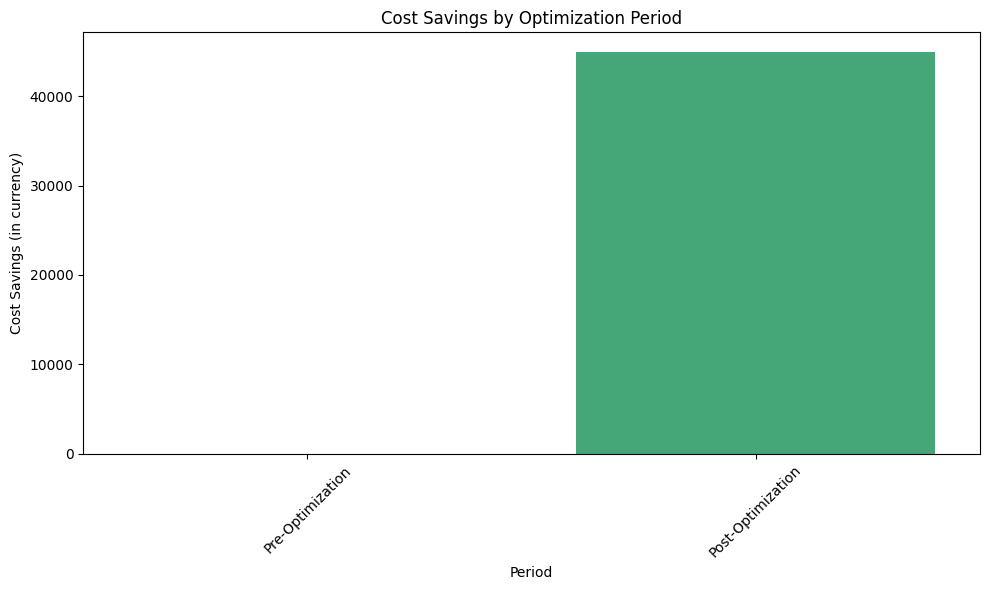

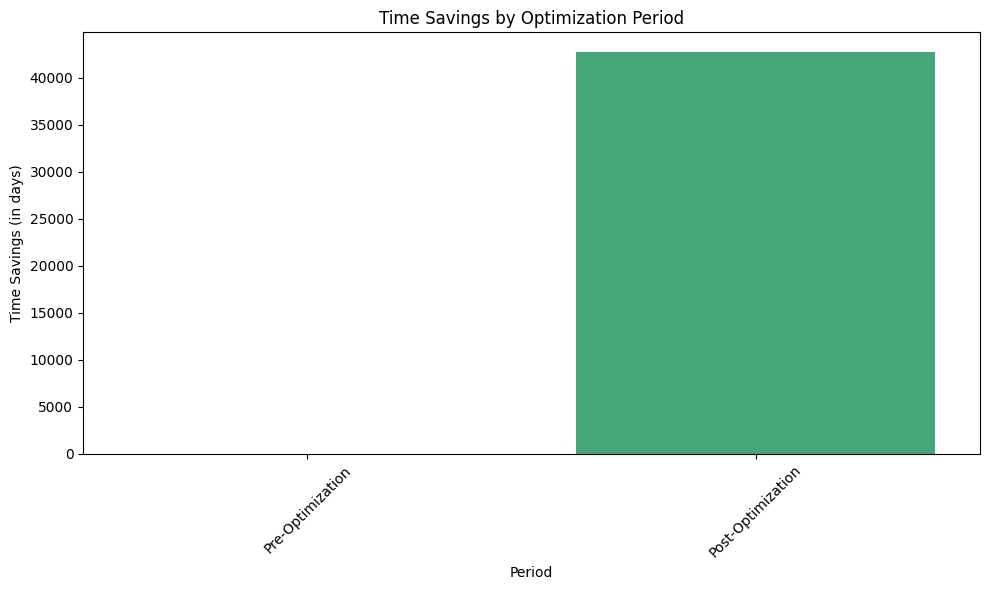

In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the final DataFrame
final_df = pd.read_csv('sample_df.csv')

# Ensure the 'period' column exists and is correctly formatted
final_df['period'] = final_df['period'].astype(str).replace('nan', 'Unknown')

# Estimate reductions in delivery times and costs
def estimate_post_optimization(df):
    # Example: Assume a certain percentage reduction based on clustering
    # These percentages can be adjusted based on historical data or assumptions
    cost_reduction_percentage = 0.20  # 20% cost reduction
    time_reduction_percentage = 0.15  # 15% time reduction

    # Calculate total pre-optimization costs and delivery times
    pre_optimization_df = df[df['period'] == 'pre']
    post_optimization_cost = pre_optimization_df['freight_value'].sum() * (1 - cost_reduction_percentage)
    post_optimization_time = pre_optimization_df['delivery_time'].sum() * (1 - time_reduction_percentage)
    
    return post_optimization_cost, post_optimization_time

# Calculate pre-optimization metrics
pre_optimization_df = final_df[final_df['period'] == 'pre']
pre_optimization_cost = pre_optimization_df['freight_value'].sum()
pre_optimization_time = pre_optimization_df['delivery_time'].sum()

# Estimate post-optimization metrics
post_optimization_cost, post_optimization_time = estimate_post_optimization(final_df)

# Calculate savings
cost_savings = pre_optimization_cost - post_optimization_cost
time_savings = pre_optimization_time - post_optimization_time

# Create savings DataFrame for output
savings_results = pd.DataFrame({
    'Period': ['Pre-Optimization', 'Post-Optimization'],
    'Total Cost': [pre_optimization_cost, post_optimization_cost],
    'Total Delivery Time': [pre_optimization_time, post_optimization_time],
    'Cost Savings': [0, cost_savings],
    'Time Savings': [0, time_savings]
})

print("Savings Calculation:")
print(savings_results)

# Plot cost savings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=savings_results, x='Period', y='Cost Savings', palette='viridis')
plt.title('Cost Savings by Optimization Period')
plt.xlabel('Period')
plt.ylabel('Cost Savings (in currency)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot time savings
plt.figure(figsize=(10, 6))
sns.barplot(data=savings_results, x='Period', y='Time Savings', palette='viridis')
plt.title('Time Savings by Optimization Period')
plt.xlabel('Period')
plt.ylabel('Time Savings (in days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
